# About

Sentiment analysis pada dataset twitter Anies Baswedan menggunakan TF-IDF, Naive Bayes, dan Support Vector Machine

In [129]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [130]:
import numpy as np
import pandas as pd

# Dataset

In [131]:
dataset_ab = r'/content/drive/MyDrive/Freelance/[Data] Sentiment Analysis AB-GP_TF-IDF, NB, SVM/Final Project/dataset/Anies_Labeling_3000.csv'

In [132]:
data_anies = pd.read_csv(dataset_ab, delimiter=';')
data_anies

,tweet,label
0,tifsembiring iya percaya buka follower dukung ...,0
1,aniesbaswedan nasdem nasdembabel lebar tata anies,0
2,abylio sidiq barbaro catat ali helmifelis f fa...,0
3,ferry kdg ganjarpranowo hc poirot tukang hoax ...,0
4,papa loren djumadideddy coba pahit suka bikin ...,0
...,...,...
2995,monggo adu gagas rakyat nilai obyektif forum d...,2
2996,survei smrc elektabilitas ganjar persen anies ...,2
2997,sutanmangara anies mafia kelebihanbayar apbd t...,2
2998,forum kalimantan bangkit nilai urgensi milu pa...,2


In [133]:
data_anies.isnull().sum()

tweet    0
label    0
dtype: int64

In [134]:
df_anies = data_anies.copy()

mapping label yang berbentuk angka menjadi bentuk klasifikasi (positif, negatif, neutral)

In [135]:
df_anies["observasi"] = df_anies["label"].map({0: "negatif", 1: "positif", 2: "neutral"})
df_anies.head()

,tweet,label,observasi
0,tifsembiring iya percaya buka follower dukung ...,0,negatif
1,aniesbaswedan nasdem nasdembabel lebar tata anies,0,negatif
2,abylio sidiq barbaro catat ali helmifelis f fa...,0,negatif
3,ferry kdg ganjarpranowo hc poirot tukang hoax ...,0,negatif
4,papa loren djumadideddy coba pahit suka bikin ...,0,negatif


In [136]:
# Cek sample dari data
sample_anies = df_anies.groupby('label').apply(lambda x: x.sample(5))
sample_anies

tweet  label observasi
label                                                                         
0     914   krisyantooni anies komentar presiden seru gila...      0   negatif
      318   helmifelis puas rakyat indonesia pimpin jokowi...      0   negatif
      59    yurissa samosir ardhanifariz bantu promosiin g...      0   negatif
      1072  anies nafsu banget presiden kadrun aniesdiduku...      0   negatif
      178           aniesindo jsedoe ukur otak sijokowi anies      0   negatif
1     1834                                    dua piluh anies      1   positif
      2390  mas aniesbaswedan proporsional tutup mundur de...      1   positif
      1516               jatayu benalu demokrasi menang anies      1   positif
      2211       anies fairplay usaha cari jalan susah rakyat      1   positif
      2437  sedih menang covid anies fairplay pimpin andal...      1   positif
2     2699  hendrohomeira tifsembiring beda erdogan indone...      2   neutral
      2686  anies pilpres kalah putar dukung gabung prabow...      2   neutral
      2571   tjel nyinyir anies prabowo ganjar malihh set deh      2   neutral
      2940  merespon nyata presiden joko widodo jokowi caw...      2   neutral
      2602  heri stefanantonio gibran tweet laku teman duk...      2   neutral

In [137]:
df_anies["observasi"].value_counts()

positif    1398
negatif    1119
neutral     483
Name: observasi, dtype: int64

Hitung proporsi distribusi untuk menentukan metode OVR atau OVO dalam model Naive Bayes

In [138]:
# Tentukan distribusi masing-masing hasil labeling
class_distribution = pd.DataFrame({'sentimen': ['positif', 'negatif', 'neutral'],
                                   'value_counts': [1398, 1119, 483]})

# Hitung proporsi distribusi
class_distribution['proporsi'] = (class_distribution['value_counts'] / class_distribution['value_counts'].sum()) * 100
print(class_distribution)

  sentimen  value_counts  proporsi
0  positif          1398      46.6
1  negatif          1119      37.3
2  neutral           483      16.1


# TF IDF dan Naive Bayes

In [139]:
def feature_extraction(data, method="tfidf"):
    from sklearn.feature_extraction.text import TfidfVectorizer

    feature_extraction = TfidfVectorizer(sublinear_tf=True)
    features = feature_extraction.fit_transform(data)

    return features

def nb_classifier(features, label, classifier="naive_bayes"):
    from sklearn.metrics import roc_auc_score
    from sklearn.naive_bayes import MultinomialNB
    from sklearn.preprocessing import label_binarize

    model = MultinomialNB()
    model.fit(features, label)
    probability_to_be_positive = model.predict_proba(features)
    predict_output = model.predict(features)

    # Konversi label multi-class ke format one-hot-encoding
    binarized_label = label_binarize(label, classes=np.unique(label))

    # Gunakan  multi_class='ovo' karena proporsi distribusi tidak seimbang
    print("auc (train data):" , roc_auc_score(
        binarized_label,
        probability_to_be_positive,
        multi_class='ovo'))

    print("top 10 scores:")
    for i in range(10):
        if predict_output[i] == 0:
            label = 'negatif'
        elif predict_output[i] == 1:
            label = 'positif'
        elif predict_output[i] == 2:
            label = 'neutral'
        print(f"{probability_to_be_positive[i]} = {predict_output[i]} ({label})")

    return model

In [140]:
data = np.array(df_anies["tweet"])
label = np.array(df_anies["label"])

Lakukan pembobotan untuk masing-masing kata pada tweet.

In [141]:
features = feature_extraction(data, method="tfidf")
print(features)

  (0, 278)	0.07653809293407547
  (0, 1491)	0.2635639750626865
  (0, 1722)	0.5795703256375672
  (0, 886)	0.38162265557163777
  (0, 4471)	0.35974298383050013
  (0, 2400)	0.4343399926295063
  (0, 5923)	0.3536553324372686
  (1, 5774)	0.4782861284693364
  (1, 3221)	0.5067653138209063
  (1, 3922)	0.583929988099476
  (1, 3921)	0.32571282921286504
  (1, 280)	0.24974372956104474
  (1, 278)	0.07068442155841848
  (2, 1500)	0.22779673878646098
  (2, 6108)	0.15468278451626286
  (2, 2983)	0.1806923411116537
  (2, 4365)	0.1597891694619273
  (2, 5286)	0.26870609783399246
  (2, 442)	0.2353788532885947
  (2, 4218)	0.18522955629240015
  (2, 5315)	0.16525736453571474
  (2, 5999)	0.26870609783399246
  (2, 340)	0.16865806439049144
  (2, 4563)	0.22160170015918518
  (2, 2947)	0.22455822845425888
  :	:
  (2997, 278)	0.045032155026293756
  (2998, 4435)	0.3620593867815221
  (2998, 6171)	0.3620593867815221
  (2998, 2683)	0.33187248317097273
  (2998, 4716)	0.29655606992086186
  (2998, 536)	0.3444011801564667
  (29

Lakukan training menggunakan model Naive Bayes.

In [142]:
nb_train = nb_classifier(features, label, "naive_bayes")
print(nb_train)

auc (train data): 0.9898310623011061
top 10 scores:
[0.47339604 0.44521153 0.08139244] = 0 (negatif)
[0.66669559 0.23922514 0.09407927] = 0 (negatif)
[0.60016252 0.31870524 0.08113225] = 0 (negatif)
[0.54252931 0.34680666 0.11066403] = 0 (negatif)
[0.48048379 0.46669361 0.0528226 ] = 0 (negatif)
[0.37248697 0.57587538 0.05163765] = 1 (positif)
[0.74313964 0.19393022 0.06293014] = 0 (negatif)
[0.75975464 0.18577329 0.05447207] = 0 (negatif)
[0.75695306 0.20602271 0.03702423] = 0 (negatif)
[0.57108932 0.39683794 0.03207274] = 0 (negatif)
MultinomialNB()


In [143]:
import pandas as pd
import numpy as np
import pickle

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

Lakukan pemrosesan TF-IDF dengan data tweet sebagai variabel X dan data label sebagai variabel y.

In [144]:
X = df_anies['tweet']
y = df_anies['label']

bow_transformer = CountVectorizer().fit(df_anies['tweet'])
messages_bow = bow_transformer.transform(df_anies['tweet'])
tfidf_transformer = TfidfTransformer().fit(messages_bow)
messages_tfidf = tfidf_transformer.transform(messages_bow)

Lakukan kembali proses train dan split dengan rasio yang sama yaitu data train sebesar 80% dan data test sebesar 20%.

In [145]:
X_train,X_test,y_train,y_test = train_test_split(df_anies['tweet'],df_anies['label'],test_size=0.2,random_state=42)

pipeline = Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
    ])

X_train = np.asarray(X)
pipeline = pipeline.fit(X_train, np.asarray(y))

Buat data pickle setelah proses training selesai dilakukan. Pickle akan digunakan untuk menjalankan proses deep learning.

In [146]:
pickle_name = 'df_anies_nb.pickle'
pickle_path = '/content/drive/MyDrive/Freelance/[Data] Sentiment Analysis AB-GP_TF-IDF, NB, SVM/Final Project/pickle/'

In [147]:
with open(pickle_path+pickle_name, 'wb') as f:
    pickle.dump(pipeline, f)

Ganti parameter open untuk membaca atau menggunakan pickle.

In [148]:
with open(pickle_path+pickle_name, 'rb') as f:
    pickle_anies = pickle.load(f)
    print(pickle_anies)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])


Lakukan prediksi dengan dataset lain

In [149]:
path_test = r'/content/drive/MyDrive/Freelance/[Data] Sentiment Analysis AB-GP_TF-IDF, NB, SVM/Final Project/dataset/Evaluasi/Anies_Testing_Model.csv'

In [150]:
df_test = pd.read_csv(path_test, delimiter=',')
df_test.head()

,date,renderedContent,username,cleaning,case_folding,tokenisasi,normalisasi,stopword_removal,stemming
0,2023-05-30 01:42:25+00:00,@ruhutsitompul Anies kira pilpres sama dgn pil...,lubis_punk,ruhutsitompul Anies kira pilpres sama dgn pil...,ruhutsitompul anies kira pilpres sama dgn pil...,"['ruhutsitompul', 'anies', 'kira', 'pilpres', ...","['ruhutsitompul', 'anies', 'kira', 'pilpres', ...","['ruhutsitompul', 'anies', 'pilpres', 'pilkada...",ruhutsitompul anies pilpres pilkada dkijakarta
1,2023-05-29 22:43:31+00:00,@Jabir_Sink @Muhammad_Saewad Kl Anies gk ada d...,teponkLK74,Jabir_Sink Muhammad_Saewad Anies ada pemilu b...,jabir_sink muhammad_saewad anies ada pemilu b...,"['jabir_sink', 'muhammad_saewad', 'anies', 'ad...","['jabir_sink', 'muhammad_saewad', 'anies', 'ad...","['jabir_sink', 'muhammad_saewad', 'anies', 'pe...",jabir sink muhammad saewad anies milu junjung ...
2,2023-05-28 09:31:16+00:00,"Kalo Pak Anies jadi presiden, aku sih yes. Lia...",kam_pretttt,Kalo Pak Anies jadi presiden aku sih yes Liat ...,kalo pak anies jadi presiden aku sih yes liat ...,"['kalo', 'pak', 'anies', 'jadi', 'presiden', '...","['kalo', 'pak', 'anies', 'jadi', 'presiden', '...","['anies', 'presiden', 'yes', 'lihat', 'track',...",anies presiden yes lihat track record tokcer ragu
3,2023-05-30 09:06:00+00:00,Indonesia mengajar kini sudah berusia kurang l...,klimakks,Indonesia mengajar kini sudah berusia kurang l...,indonesia mengajar kini sudah berusia kurang l...,"['indonesia', 'mengajar', 'kini', 'sudah', 'be...","['indonesia', 'mengajar', 'kini', 'sudah', 'be...","['indonesia', 'mengajar', 'berusia', 'anies', ...",indonesia ajar usia anies percaya indonesia aj...
4,2023-05-30 02:53:56+00:00,@kasman_abdya @bachrum_achmadi Lucu kan 10 tah...,AgungHa05086506,kasman_abdya bachrum_achmadi Lucu kan tahun S...,kasman_abdya bachrum_achmadi lucu kan tahun s...,"['kasman_abdya', 'bachrum_achmadi', 'lucu', 'k...","['kasman_abdya', 'bachrum_achmadi', 'lucu', 'k...","['kasman_abdya', 'bachrum_achmadi', 'lucu', 's...",kasman abdya bachrum achmadi lucu surabaya duk...


Berdasarkan dataset, data yang diperlukan pada feature enineering ini hanyalah data terakhir yaitu setelah pemrosesan pada tahap pre-processing selesai dilakukan.

In [151]:
df_test = df_test[["stemming"]].rename(columns={"stemming": "tweet"})
df_test = df_test["tweet"]
df_test

0           ruhutsitompul anies pilpres pilkada dkijakarta
1        jabir sink muhammad saewad anies milu junjung ...
2        anies presiden yes lihat track record tokcer ragu
3        indonesia ajar usia anies percaya indonesia aj...
4        kasman abdya bachrum achmadi lucu surabaya duk...
                               ...                        
11402                sikap fairplaynya anies hormat hormat
11403    tanyakanrl anies lumayan gub bijak kadang luar...
11404    anies puji adu gagas harap warna pilpres pilpr...
11405    iamil heraloebss lapor lapor nama lapor lurah ...
11406            fairplay pilar anies diri mimbar presiden
Name: tweet, Length: 11407, dtype: object

In [152]:
null_values = df_test.isnull().sum()
print(f"Total null values: {null_values}")

Total null values: 0


In [153]:
duplikat = df_test.duplicated(keep=False).sum()
print("Total duplikat:", duplikat)

Total duplikat: 0


In [154]:
# Drop duplikat jika ada
df_test = df_test.drop_duplicates()

duplikat = df_test.duplicated(keep=False).sum()
print("Total duplikat:", duplikat)

Total duplikat: 0


Lakukan prediksi menggunakan pickle yang telah dibuat sebelumnya.

In [155]:
prediction = pickle_anies.predict(np.asarray(df_test))
prediction

array([0, 0, 1, ..., 1, 1, 1])

Simpan hasil prediksi ke dalam dataset dengan cara melakukan looping sesuai hasil prediksi. Parameter yang digunakan masih sama seperti sebelumnya, yaitu:

- Prediksi 0: Negatif
- Prediksi 1: Positif
- Prediksi 2: Neutral

In [156]:
result = []

for i in range(len(prediction)):
    if(prediction[i] == 0):
        sentiment = 'negatif'
    elif(prediction[i] == 1):
        sentiment = 'positif'
    elif(prediction[i] == 2):
        sentiment = 'neutral'

    result.append({'tweet':df_test.iloc[i],'label':prediction[i],'prediksi':sentiment})

data = pd.DataFrame(result)
data

,tweet,label,prediksi
0,ruhutsitompul anies pilpres pilkada dkijakarta,0,negatif
1,jabir sink muhammad saewad anies milu junjung ...,0,negatif
2,anies presiden yes lihat track record tokcer ragu,1,positif
3,indonesia ajar usia anies percaya indonesia aj...,1,positif
4,kasman abdya bachrum achmadi lucu surabaya duk...,0,negatif
...,...,...,...
11402,sikap fairplaynya anies hormat hormat,1,positif
11403,tanyakanrl anies lumayan gub bijak kadang luar...,0,negatif
11404,anies puji adu gagas harap warna pilpres pilpr...,1,positif
11405,iamil heraloebss lapor lapor nama lapor lurah ...,1,positif


In [157]:
sample_prediksi = data.groupby('prediksi').apply(lambda x: x.sample(5))
sample_prediksi

tweet  label  \
prediksi                                                                   
negatif  8744   anies menang menang ngibul jago kristen muhamm...      0   
         4581   sutanmangara anies apbd dki uap pinginnya moda...      0   
         4447   usmanabds partburunggalak dijelasin buzzerp po...      0   
         9124   smart pancing yuk buzzer buzzer anies nunjukki...      0   
         9008   dennysiregar bahan fitnah anies cari bahan ber...      0   
neutral  5224   intip survei baru capres prabowo ganjar anies ...      2   
         8482   anies harap pilpres jalan adil jokowi cawe caw...      2   
         9754   prabowo dukung cenderung tingkat ganjar relati...      2   
         3465   effendiristriy akunke puas survei tingi jokowi...      2   
         9546   ganjar unggul prabowo anies ganjarcapres ganja...      2   
positif  9397   anies pimpin tokcer dunia politik pilih sosok ...      1   
         10342  pesan tokcer anies tutup aurat selamat lindung...      1   
         957                 anies saran laksana ragu undur undur      1   
         3170                             anies fairplay semangat      1   
         4862   helmifelis jaga bangsa pecah pilih anies parta...      1   

               prediksi  
prediksi                 
negatif  8744   negatif  
         4581   negatif  
         4447   negatif  
         9124   negatif  
         9008   negatif  
neutral  5224   neutral  
         8482   neutral  
         9754   neutral  
         3465   neutral  
         9546   neutral  
positif  9397   positif  
         10342  positif  
         957    positif  
         3170   positif  
         4862   positif

Lakukan pengecekan tiap data pada masing-masing prediksi, kemudian buat wordcloudnya

In [158]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Lakukan pengecekan pada data positif.

In [159]:
positif = data.loc[data['prediksi']=='positif', 'tweet']
positif

2        anies presiden yes lihat track record tokcer ragu
3        indonesia ajar usia anies percaya indonesia aj...
6                     indonesia butuh sosok presiden anies
7        ch chotimah ganjarpranowo sehat sehat tes cenu...
11                         anies yakin percaya tuhan hidup
                               ...                        
11401    oranjexiv hans sajah txtbacod detikcom anies t...
11402                sikap fairplaynya anies hormat hormat
11404    anies puji adu gagas harap warna pilpres pilpr...
11405    iamil heraloebss lapor lapor nama lapor lurah ...
11406            fairplay pilar anies diri mimbar presiden
Name: tweet, Length: 6263, dtype: object

Lakukan looping untuk melihat setiap tweet dengan sentimen positif

In [160]:
for pos in positif[:10]:
    print(pos)

anies presiden yes lihat track record tokcer ragu
indonesia ajar usia anies percaya indonesia ajar lanjut
indonesia butuh sosok presiden anies
ch chotimah ganjarpranowo sehat sehat tes cenul depan ide karya nyata anies rekam jejak paham
anies yakin percaya tuhan hidup
fahrihamzah nampol wan anies
wawas luas anies ajak diskus anies tokcer senang teman diskusi
miduk hantoro muipusat rasa anies twitter com korantempo sta jalan
anies putra baik negeri didik indonesia ubah
anies pimpin milik sikap


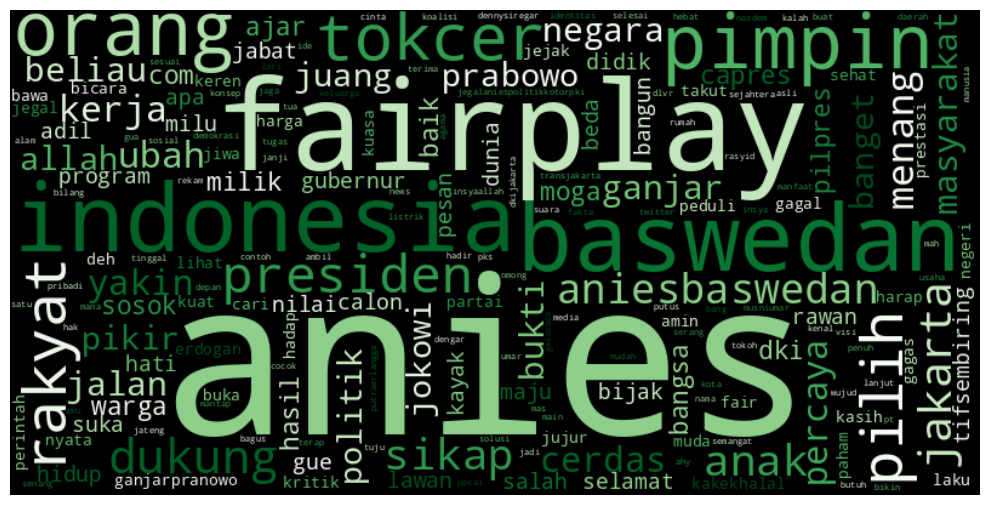

In [161]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Tokenize ulang kolom "NoStopwordsTweets" agar kalimat dikonversi menjadi kata-kata.
re_tokenize = [nltk.word_tokenize(tweet) for tweet in positif]

# Flatten: Konversi list kata-kata ke dalam satu list
list_kata = nltk.FreqDist([kata for tweet in re_tokenize for kata in tweet])

# Wordcloud
wordcloud = WordCloud(width=800, height=400, colormap='Greens').generate_from_frequencies(list_kata)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [162]:
top_10_positif = list_kata.most_common(10)

data_positif = {
    'Kata Positif': [kata for kata, total in top_10_positif],
    'Total': [total for kata, total in top_10_positif]
}

tabel_positif = pd.DataFrame(data_positif)
tabel_positif

,Kata Positif,Total
0,anies,6962
1,fairplay,988
2,indonesia,768
3,baswedan,747
4,pimpin,735
5,orang,709
6,tokcer,682
7,rakyat,572
8,pilih,546
9,presiden,528


Lakukan pengecekan pada data negatif.

In [163]:
negatif = data.loc[data['prediksi']=='negatif', 'tweet']
negatif

0           ruhutsitompul anies pilpres pilkada dkijakarta
1        jabir sink muhammad saewad anies milu junjung ...
4        kasman abdya bachrum achmadi lucu surabaya duk...
5        alhamdulillah guru honorer pai milik kriteria ...
8        streetlawyers abu waras aniesbaswedan nasdem j...
                               ...                        
11392    nurrokh aniesbaswedan assalamualaikum mashee b...
11393    sangpejuank aniesgarislucu trikartikatika stud...
11396    bambangmulyonoo cebong panik selisih cuman sur...
11399    kubu anies manyun menang malu tolak hasil surv...
11403    tanyakanrl anies lumayan gub bijak kadang luar...
Name: tweet, Length: 4415, dtype: object

Lakukan looping untuk melihat setiap tweet dengan sentimen negatif

In [164]:
for neg in negatif[:10]:
    print(neg)

ruhutsitompul anies pilpres pilkada dkijakarta
jabir sink muhammad saewad anies milu junjung takut takut allah swt takut anies
kasman abdya bachrum achmadi lucu surabaya dukung pks jokowi dukung nasdem bacapres anies usung ubah hasil pks nasdem omong kosong belaka partai makan gaji buta ubah
alhamdulillah guru honorer pai milik kriteria terima rapel uang insentif kabar kabarid com nasional kaesang kebiri lepas rafathar prabowo ganjar anies
streetlawyers abu waras aniesbaswedan nasdem jhon plate pencapresan anies
jabir sink tatakujiyati buzzer jelek anies bikin dosa bagus cari duit modal kuajarin profit
gagas ubah asik program kayak sono omong doang gagas ubah program orang sadar anies gede omong gede bacot otak
gara gara anies takut
masdepree veelaarhie aniesbaswedan ahli anies
dennysiregar aniesbaswedan aneh den anies rendah hasil survey anies takut banteng komunis mega pdip sanking takut orang banteng tidur jam melek allah tanda orang underdog anies serang buzzer


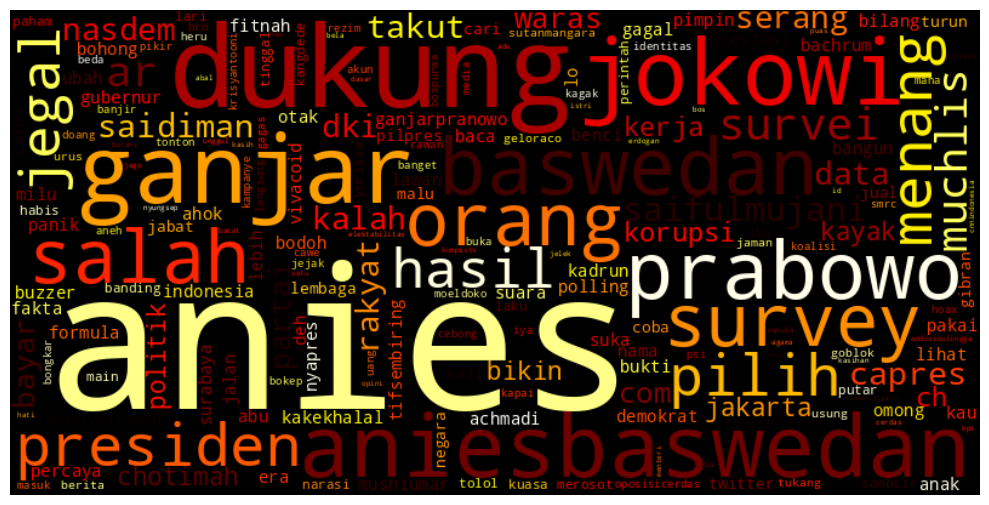

In [165]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Tokenize ulang kolom "NoStopwordsTweets" agar kalimat dikonversi menjadi kata-kata.
re_tokenize = [nltk.word_tokenize(tweet) for tweet in negatif]

# Flatten: Konversi list kata-kata ke dalam satu list
list_kata = nltk.FreqDist([kata for tweet in re_tokenize for kata in tweet])

# Wordcloud
wordcloud = WordCloud(width=800, height=400, colormap='hot').generate_from_frequencies(list_kata)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [166]:
top_10_negatif = list_kata.most_common(10)

data_negatif = {
    'Kata Negatif': [kata for kata, total in top_10_negatif],
    'Total': [total for kata, total in top_10_negatif]
}

tabel_negatif = pd.DataFrame(data_negatif)
tabel_negatif

,Kata Negatif,Total
0,anies,5381
1,dukung,768
2,ganjar,519
3,jokowi,480
4,aniesbaswedan,468
5,prabowo,399
6,baswedan,382
7,salah,336
8,orang,334
9,survey,328


Lakukan pengecekan pada data neutral.

In [167]:
neutral = data.loc[data['prediksi']=='neutral', 'tweet']
neutral

10       bos sir langkahanies anies rawan aniesindonesi...
71       cnbcindonesia com news populi center rilis has...
73       jokowi cawe cawe pilpres penasaran kalah anies...
75       smrc elektabilitas ganjar unggul prabowo anies...
88       ztw rd ganjar prabowo duet ganjar capres prabo...
                               ...                        
11341    polling podcast afu calon presiden paham seles...
11375    semenjak malam siang terima ungkap aspirasi kh...
11376        denny siregar anies halal pilpres dlvr spnrby
11377    rocky gerung info upaya tokoh nasional lemah a...
11400    war duduk pangku messi kitagaruda garudamendun...
Name: tweet, Length: 729, dtype: object

In [168]:
for net in neutral[:10]:
    print(net)

bos sir langkahanies anies rawan aniesindonesia aniesmania kba news usir asong khilafah
cnbcindonesia com news populi center rilis hasil survei baru kait elektabilitas calon presiden menteri tahan prabowo subianto unggul banding saing dekat ganjar pranowo anies baswedan berita mei
jokowi cawe cawe pilpres penasaran kalah anies gelora jokowi
smrc elektabilitas ganjar unggul prabowo anies turki taka erdogan nang baca vibrasi smrc elektabil
ztw rd ganjar prabowo duet ganjar capres prabowo cawapres kubu anies senang menang langsung head head capresnya ganjar wakil anies menang
ikut partai partai calon presiden pdip usung ganjar pranowo nasdem demokrat pks dukung anies baswedan gerindra pkb usung prabowo subianto bersamajuara ridwankamil
elfatihideo heraloebss prabowo ahok kenal puan anies jokowi
ayo ikut polling capres pilih urut nama sesuai abjad anies baswedan ganjar pranowo prabowo subianto total votes senin wib link duniapolling com sila rtl
prabowo unggul jawa barat oleh sumatera utar

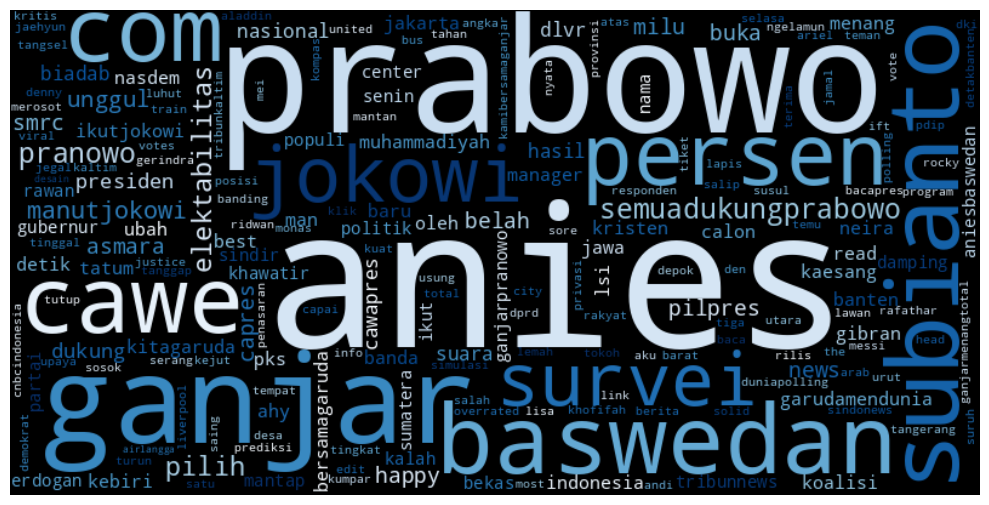

In [169]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Tokenize ulang kolom "NoStopwordsTweets" agar kalimat dikonversi menjadi kata-kata.
re_tokenize = [nltk.word_tokenize(tweet) for tweet in neutral]

# Flatten: Konversi list kata-kata ke dalam satu list
list_kata = nltk.FreqDist([kata for tweet in re_tokenize for kata in tweet])

# Wordcloud
wordcloud = WordCloud(width=800, height=400, colormap='Blues_r').generate_from_frequencies(list_kata)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [170]:
top_10_neutral = list_kata.most_common(10)

data_neutral = {
    'Kata Neutral': [kata for kata, total in top_10_neutral],
    'Total': [total for kata, total in top_10_neutral]
}

tabel_neutral = pd.DataFrame(data_neutral)
tabel_neutral

,Kata Neutral,Total
0,anies,796
1,prabowo,550
2,ganjar,400
3,subianto,242
4,baswedan,239
5,cawe,228
6,com,206
7,persen,188
8,jokowi,148
9,survei,145


Lanjutkan dengan melihat banyaknya sentiment positif, negatif, dan netral dari hasil prediksi.

In [171]:
data.groupby(by='prediksi').agg('count')

,tweet,label
prediksi,,
negatif,4415,4415
neutral,729,729
positif,6263,6263


In [172]:
data.groupby(by='prediksi')['tweet'].agg('count')

prediksi
negatif    4415
neutral     729
positif    6263
Name: tweet, dtype: int64

Tampilkan dalam bentuk grafik untuk memudahkan dalam melihat klasifikasi sentimen.

In [173]:
list_prediksi = data.groupby(by='prediksi').agg('count').values.tolist()
print(list_prediksi)

[[4415, 4415], [729, 729], [6263, 6263]]


In [174]:
n_negatif = list_prediksi[0][0]
n_neutral = list_prediksi[1][0]
n_positif = list_prediksi[2][0]

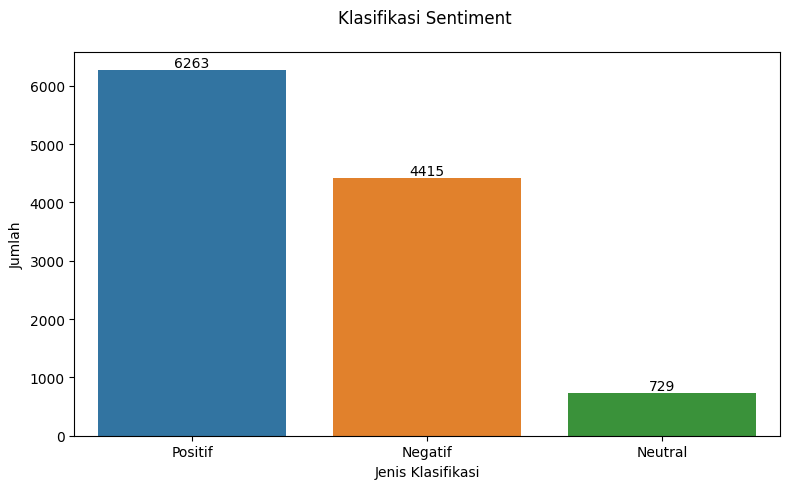

In [175]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = [8,5]
plt.rcParams["figure.autolayout"] = True

x = ['Positif', 'Negatif', 'Neutral']
y = [n_positif, n_negatif, n_neutral]
percentage = [n_positif, n_negatif, n_neutral]

ax = sns.barplot(x=x, y=y)
patches = ax.patches
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()+50
    ax.annotate('{:}'.format(percentage[i]), (x, y), ha='center')

plt.title('Klasifikasi Sentiment \n')
plt.xlabel('Jenis Klasifikasi')
plt.ylabel('Jumlah')
plt.show()

Berdasarkan grafik, didapatkan data sebagai berikut.

1. Sentiment positif merupakan sentiment terbanyak dengan total 6263 sentiment.
2. Sentiment negatif merupakan sentiment dengan total 4415 sentiment.
3. Sentiment neutral merupakan sentiment tersedikit dengan total 729 sentiment.


## Evaluasi

Cek confussion matrix, classification report, dan cross val score.

In [176]:
data2 = data.copy()
data2.head(5)

,tweet,label,prediksi
0,ruhutsitompul anies pilpres pilkada dkijakarta,0,negatif
1,jabir sink muhammad saewad anies milu junjung ...,0,negatif
2,anies presiden yes lihat track record tokcer ragu,1,positif
3,indonesia ajar usia anies percaya indonesia aj...,1,positif
4,kasman abdya bachrum achmadi lucu surabaya duk...,0,negatif


Tentukan variabel X dan y terlebih dahulu agar dapat digunakan pada pemodelan.

In [177]:
# Menentukan x berdasarkan label
data_tweet = pd.DataFrame(data2,columns=['tweet'])
X = data_tweet['tweet']
X

0           ruhutsitompul anies pilpres pilkada dkijakarta
1        jabir sink muhammad saewad anies milu junjung ...
2        anies presiden yes lihat track record tokcer ragu
3        indonesia ajar usia anies percaya indonesia aj...
4        kasman abdya bachrum achmadi lucu surabaya duk...
                               ...                        
11402                sikap fairplaynya anies hormat hormat
11403    tanyakanrl anies lumayan gub bijak kadang luar...
11404    anies puji adu gagas harap warna pilpres pilpr...
11405    iamil heraloebss lapor lapor nama lapor lurah ...
11406            fairplay pilar anies diri mimbar presiden
Name: tweet, Length: 11407, dtype: object

In [178]:
# Menentukan y berdasarkan label
data_label = pd.DataFrame(data2,columns=['label'])
y = data_label['label']
y

0        0
1        0
2        1
3        1
4        0
        ..
11402    1
11403    0
11404    1
11405    1
11406    1
Name: label, Length: 11407, dtype: int64

Lakukan pembagian antara data train dan data test dengan rasio 8:2 atau data train sebesar 80% dan data test sebesar 20%.

In [179]:
from sklearn.model_selection import train_test_split

# Split dataset untuk train dan test
X_train,X_test,Y_train,Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Lakukan vektorisasi untuk TF-IDF.

In [180]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF train-test
vect = TfidfVectorizer(analyzer="word", min_df=0.0004, max_df=0.115, ngram_range=(1,3))
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)
X_test_dtm = vect.transform(X_test)

Lakukan perhitungan skor akurasi berdasarkan MultinomialNB.

In [181]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Melakukan perhitungan skor akurasi berdasarkan MultinomialNB
nbmodel = MultinomialNB(alpha=0.1)
nbmodel = nbmodel.fit(X_train_dtm,Y_train)
Y_pred = nbmodel.predict(X_test_dtm)
print(f"Akurasi: {accuracy_score(Y_test,Y_pred)*100:.2f}")

Akurasi: 86.85


Tentukan hasil dari confusion matrix

In [182]:
from sklearn.metrics import confusion_matrix

# Menentukan confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
print(f"Confusion Matrix:\n\n{cm}")

Confusion Matrix:

[[ 800   92   10]
 [ 158 1070   16]
 [  12   12  112]]


In [183]:
sentimen = ['Negatif', 'Positif', 'Neutral']
df_cm = pd.DataFrame(cm, index=sentimen, columns=sentimen)
df_cm

,Negatif,Positif,Neutral
Negatif,800,92,10
Positif,158,1070,16
Neutral,12,12,112


Tentukan hasil laporan klasifikasi.

In [184]:
from sklearn.metrics import classification_report

# Menentukan laporan hasil klasifikasi
report = classification_report(Y_test, Y_pred)
print(f"Hasil Laporan Klasifikasi:\n\n{report}")

Hasil Laporan Klasifikasi:

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       902
           1       0.91      0.86      0.89      1244
           2       0.81      0.82      0.82       136

    accuracy                           0.87      2282
   macro avg       0.85      0.86      0.85      2282
weighted avg       0.87      0.87      0.87      2282



Tentukan nilai cross_val_score.

In [185]:
from sklearn.model_selection import cross_val_score

# Menentukan nilai cross_val_score
cvs = cross_val_score(estimator=nbmodel, X=X_train_dtm, y=Y_train, cv=10)

# Loop kemudian cetak hasil
print("Cross Val Score:")
for n, score in enumerate(cvs, start=1):
    print(f"Folds ke-{n}: {score*100:.2f}")

Cross Val Score:
Folds ke-1: 86.53
Folds ke-2: 87.51
Folds ke-3: 88.17
Folds ke-4: 87.19
Folds ke-5: 87.95
Folds ke-6: 86.73
Folds ke-7: 87.72
Folds ke-8: 87.72
Folds ke-9: 86.40
Folds ke-10: 87.17


In [186]:
cvs_list = cvs.tolist()

# +1 pada nilai n_max dan n_min karena index dimulai dari 0
max_cvs = max(cvs_list)
n_max = (cvs_list.index(max_cvs)) + 1

min_cvs = min(cvs_list)
n_min = (cvs_list.index(min_cvs)) + 1

print(f"Cross val score terbesar terletak pada fold ke-{n_max} dengan nilai {max_cvs*100:.2f}")
print(f"Cross val score terkecil terletak pada fold ke-{n_min} dengan nilai {min_cvs*100:.2f}")

Cross val score terbesar terletak pada fold ke-3 dengan nilai 88.17
Cross val score terkecil terletak pada fold ke-9 dengan nilai 86.40


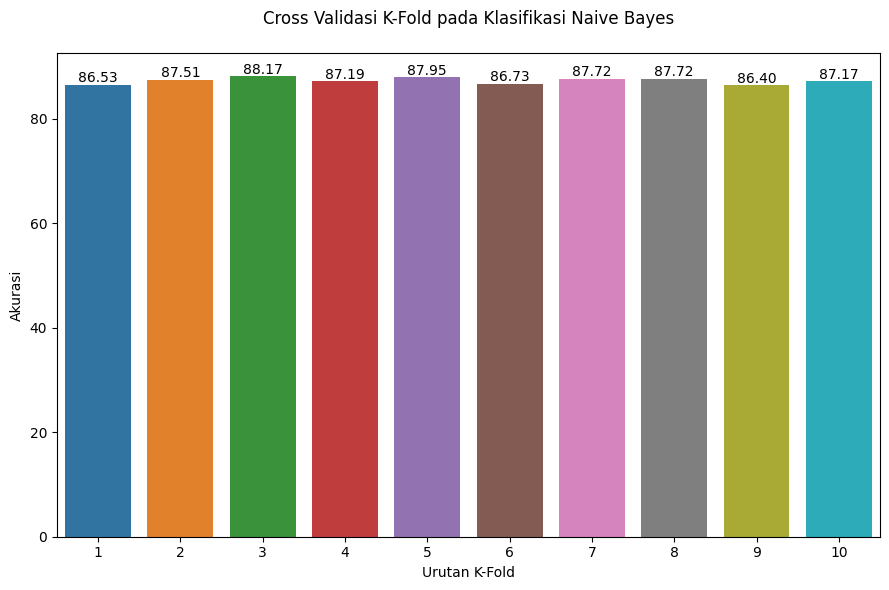

In [187]:
plt.rcParams["figure.figsize"] = [9,6]
plt.rcParams["figure.autolayout"] = True

# Tentukan x dan y pada plot
x = [1,2,3,4,5,6,7,8,9,10]
y = cvs*100

percentage = cvs*100
ax = sns.barplot(x=x, y=y)
patches = ax.patches

# Tambah keterangan di atas barplot
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()+.5
    ax.annotate('{:.2f}'.format(percentage[i]), (x, y), ha='center')

# Plot barplot
plt.title('Cross Validasi K-Fold pada Klasifikasi Naive Bayes\n')
plt.xlabel('Urutan K-Fold')
plt.ylabel('Akurasi')
plt.show()

# TF IDF dan Support Vector Machine

In [188]:
def feature_extraction(data, method="tfidf"):
    from sklearn.feature_extraction.text import TfidfVectorizer

    feature_extraction = TfidfVectorizer(sublinear_tf=True)
    features = feature_extraction.fit_transform(data)

    return features

def svm_classifier(features, label, classifier="svm"):
    from sklearn.metrics import roc_auc_score
    from sklearn.svm import SVC
    from sklearn.preprocessing import label_binarize

    model = SVC(probability=True)
    model.fit(features, label)
    probability_to_be_positive = model.predict_proba(features)
    predict_output = model.predict(features)

    # Konversi label multi-class ke format one-hot-encoding
    binarized_label = label_binarize(label, classes=np.unique(label))

    # Gunakan  multi_class='ovo' karena proporsi distribusi tidak seimbang
    print("auc (train data):" , roc_auc_score(
        binarized_label,
        probability_to_be_positive,
        multi_class='ovo'))

    print("top 10 scores:")
    for i in range(10):
        if predict_output[i] == 0:
            label = 'negatif'
        elif predict_output[i] == 1:
            label = 'positif'
        elif predict_output[i] == 2:
            label = 'neutral'
        print(f"{probability_to_be_positive[i]} = {predict_output[i]} ({label})")

    return model

In [189]:
data = np.array(df_anies["tweet"])
label = np.array(df_anies["label"])

Lakukan pembobotan untuk masing-masing kata pada tweet.

In [190]:
features = feature_extraction(data, method="tfidf")
print(features)

  (0, 278)	0.07653809293407547
  (0, 1491)	0.2635639750626865
  (0, 1722)	0.5795703256375672
  (0, 886)	0.38162265557163777
  (0, 4471)	0.35974298383050013
  (0, 2400)	0.4343399926295063
  (0, 5923)	0.3536553324372686
  (1, 5774)	0.4782861284693364
  (1, 3221)	0.5067653138209063
  (1, 3922)	0.583929988099476
  (1, 3921)	0.32571282921286504
  (1, 280)	0.24974372956104474
  (1, 278)	0.07068442155841848
  (2, 1500)	0.22779673878646098
  (2, 6108)	0.15468278451626286
  (2, 2983)	0.1806923411116537
  (2, 4365)	0.1597891694619273
  (2, 5286)	0.26870609783399246
  (2, 442)	0.2353788532885947
  (2, 4218)	0.18522955629240015
  (2, 5315)	0.16525736453571474
  (2, 5999)	0.26870609783399246
  (2, 340)	0.16865806439049144
  (2, 4563)	0.22160170015918518
  (2, 2947)	0.22455822845425888
  :	:
  (2997, 278)	0.045032155026293756
  (2998, 4435)	0.3620593867815221
  (2998, 6171)	0.3620593867815221
  (2998, 2683)	0.33187248317097273
  (2998, 4716)	0.29655606992086186
  (2998, 536)	0.3444011801564667
  (29

Lakukan training menggunakan model Naive Bayes.

In [191]:
svm_train = svm_classifier(features, label, "naive_bayes")
print(svm_train)

auc (train data): 0.9997965392990441
top 10 scores:
[0.98227901 0.00689285 0.01082814] = 0 (negatif)
[0.98152834 0.00435398 0.01411768] = 0 (negatif)
[0.9872093  0.00250244 0.01028826] = 0 (negatif)
[0.98026701 0.00827993 0.01145306] = 0 (negatif)
[0.98122038 0.01021924 0.00856037] = 0 (negatif)
[0.97306433 0.01659179 0.01034388] = 0 (negatif)
[0.98797844 0.00236406 0.0096575 ] = 0 (negatif)
[0.98478445 0.00412057 0.01109499] = 0 (negatif)
[0.98735063 0.00232319 0.01032618] = 0 (negatif)
[0.98934209 0.00238676 0.00827116] = 0 (negatif)
SVC(probability=True)


In [192]:
import pandas as pd
import numpy as np
import pickle

from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

Lakukan pemrosesan TF-IDF dengan data tweet sebagai variabel X dan data label sebagai variabel y.

In [193]:
X = df_anies['tweet']
y = df_anies['label']

bow_transformer = CountVectorizer().fit(df_anies['tweet'])
messages_bow = bow_transformer.transform(df_anies['tweet'])
tfidf_transformer = TfidfTransformer().fit(messages_bow)
messages_tfidf = tfidf_transformer.transform(messages_bow)

Lakukan kembali proses train dan split dengan rasio yang sama yaitu data train sebesar 80% dan data test sebesar 20%.

In [194]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

pipeline = Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',SVC())
    ])

X_train = np.asarray(X)
pipeline = pipeline.fit(X_train, np.asarray(y))

Buat data pickle setelah proses training selesai dilakukan. Pickle akan digunakan untuk menjalankan proses deep learning.

In [195]:
pickle_name = 'df_anies_svm.pickle'
pickle_path = '/content/drive/MyDrive/Freelance/[Data] Sentiment Analysis AB-GP_TF-IDF, NB, SVM/Final Project/pickle/'

In [196]:
with open(pickle_path+pickle_name, 'wb') as f:
    pickle.dump(pipeline, f)

Ganti parameter open untuk membaca atau menggunakan pickle.

In [197]:
with open(pickle_path+pickle_name, 'rb') as f:
    pickle_anies_svm = pickle.load(f)
    print(pickle_anies_svm)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', SVC())])


Lakukan prediksi dengan dataset lain

In [198]:
path_test = r'/content/drive/MyDrive/Freelance/[Data] Sentiment Analysis AB-GP_TF-IDF, NB, SVM/Final Project/dataset/Evaluasi/Anies_Testing_Model.csv'

In [199]:
df_test = pd.read_csv(path_test, delimiter=',')
df_test.head()

,date,renderedContent,username,cleaning,case_folding,tokenisasi,normalisasi,stopword_removal,stemming
0,2023-05-30 01:42:25+00:00,@ruhutsitompul Anies kira pilpres sama dgn pil...,lubis_punk,ruhutsitompul Anies kira pilpres sama dgn pil...,ruhutsitompul anies kira pilpres sama dgn pil...,"['ruhutsitompul', 'anies', 'kira', 'pilpres', ...","['ruhutsitompul', 'anies', 'kira', 'pilpres', ...","['ruhutsitompul', 'anies', 'pilpres', 'pilkada...",ruhutsitompul anies pilpres pilkada dkijakarta
1,2023-05-29 22:43:31+00:00,@Jabir_Sink @Muhammad_Saewad Kl Anies gk ada d...,teponkLK74,Jabir_Sink Muhammad_Saewad Anies ada pemilu b...,jabir_sink muhammad_saewad anies ada pemilu b...,"['jabir_sink', 'muhammad_saewad', 'anies', 'ad...","['jabir_sink', 'muhammad_saewad', 'anies', 'ad...","['jabir_sink', 'muhammad_saewad', 'anies', 'pe...",jabir sink muhammad saewad anies milu junjung ...
2,2023-05-28 09:31:16+00:00,"Kalo Pak Anies jadi presiden, aku sih yes. Lia...",kam_pretttt,Kalo Pak Anies jadi presiden aku sih yes Liat ...,kalo pak anies jadi presiden aku sih yes liat ...,"['kalo', 'pak', 'anies', 'jadi', 'presiden', '...","['kalo', 'pak', 'anies', 'jadi', 'presiden', '...","['anies', 'presiden', 'yes', 'lihat', 'track',...",anies presiden yes lihat track record tokcer ragu
3,2023-05-30 09:06:00+00:00,Indonesia mengajar kini sudah berusia kurang l...,klimakks,Indonesia mengajar kini sudah berusia kurang l...,indonesia mengajar kini sudah berusia kurang l...,"['indonesia', 'mengajar', 'kini', 'sudah', 'be...","['indonesia', 'mengajar', 'kini', 'sudah', 'be...","['indonesia', 'mengajar', 'berusia', 'anies', ...",indonesia ajar usia anies percaya indonesia aj...
4,2023-05-30 02:53:56+00:00,@kasman_abdya @bachrum_achmadi Lucu kan 10 tah...,AgungHa05086506,kasman_abdya bachrum_achmadi Lucu kan tahun S...,kasman_abdya bachrum_achmadi lucu kan tahun s...,"['kasman_abdya', 'bachrum_achmadi', 'lucu', 'k...","['kasman_abdya', 'bachrum_achmadi', 'lucu', 'k...","['kasman_abdya', 'bachrum_achmadi', 'lucu', 's...",kasman abdya bachrum achmadi lucu surabaya duk...


Berdasarkan dataset, data yang diperlukan pada feature enineering ini hanyalah data terakhir yaitu setelah pemrosesan pada tahap pre-processing selesai dilakukan.

In [200]:
df_test = df_test[["stemming"]].rename(columns={"stemming": "tweet"})
df_test = df_test["tweet"]
df_test

0           ruhutsitompul anies pilpres pilkada dkijakarta
1        jabir sink muhammad saewad anies milu junjung ...
2        anies presiden yes lihat track record tokcer ragu
3        indonesia ajar usia anies percaya indonesia aj...
4        kasman abdya bachrum achmadi lucu surabaya duk...
                               ...                        
11402                sikap fairplaynya anies hormat hormat
11403    tanyakanrl anies lumayan gub bijak kadang luar...
11404    anies puji adu gagas harap warna pilpres pilpr...
11405    iamil heraloebss lapor lapor nama lapor lurah ...
11406            fairplay pilar anies diri mimbar presiden
Name: tweet, Length: 11407, dtype: object

In [201]:
null_values = df_test.isnull().sum()
print(f"Total null values: {null_values}")

Total null values: 0


In [202]:
duplikat = df_test.duplicated(keep=False).sum()
print("Total duplikat:", duplikat)

Total duplikat: 0


In [203]:
# Drop duplikat jika ada
df_test = df_test.drop_duplicates()

duplikat = df_test.duplicated(keep=False).sum()
print("Total duplikat:", duplikat)

Total duplikat: 0


Lakukan prediksi menggunakan pickle yang telah dibuat sebelumnya.

In [204]:
prediction = pickle_anies_svm.predict(np.asarray(df_test))
prediction

array([0, 0, 1, ..., 1, 0, 1])

Simpan hasil prediksi ke dalam dataset dengan cara melakukan looping sesuai hasil prediksi. Parameter yang digunakan masih sama seperti sebelumnya, yaitu:

- Prediksi 0: Negatif
- Prediksi 1: Positif
- Prediksi 2: Neutral

In [205]:
result = []

for i in range(len(prediction)):
    if(prediction[i] == 0):
        sentiment = 'negatif'
    elif(prediction[i] == 1):
        sentiment = 'positif'
    elif(prediction[i] == 2):
        sentiment = 'neutral'

    result.append({'tweet':df_test.iloc[i],'label':prediction[i],'prediksi':sentiment})

data = pd.DataFrame(result)
data

,tweet,label,prediksi
0,ruhutsitompul anies pilpres pilkada dkijakarta,0,negatif
1,jabir sink muhammad saewad anies milu junjung ...,0,negatif
2,anies presiden yes lihat track record tokcer ragu,1,positif
3,indonesia ajar usia anies percaya indonesia aj...,1,positif
4,kasman abdya bachrum achmadi lucu surabaya duk...,0,negatif
...,...,...,...
11402,sikap fairplaynya anies hormat hormat,1,positif
11403,tanyakanrl anies lumayan gub bijak kadang luar...,0,negatif
11404,anies puji adu gagas harap warna pilpres pilpr...,1,positif
11405,iamil heraloebss lapor lapor nama lapor lurah ...,0,negatif


In [206]:
sample_prediksi = data.groupby('prediksi').apply(lambda x: x.sample(5))
sample_prediksi

tweet  label  \
prediksi                                                                  
negatif  7299                 anies malu sebar benci tolak anies      0   
         6227            a rogansi yradianto kecoak anies nongol      0   
         8075  uwongdeso romitsut anjing romitsut andisinulin...      0   
         2804  nuelmend ekowboy anies samabdg jokowi buat bij...      0   
         4654  bospurwa mandor kadrun polling polling kadrun ...      0   
neutral  4717  konser mahal bang messi murah riah kitagaruda ...      2   
         4036  marlina idha anies ambil momentum ganjar presiden      2   
         1814  kayak tiket konser pssi hrganya manusiawi masu...      2   
         2691  tanggap bpk anies lurah cawe cawe milu santun ...      2   
         6626  ganjar prabowo perkasa survei smrc anies anjlo...      2   
positif  2787  harap anies baswedan inspirasi tarung pilpres ...      1   
         5812                      anies fairplay bahagia senang      1   
         8709    anies enggak pernah takut ambil putus deh hebat      1   
         6117  rahasia dunia internasional betapa bejat polit...      1   
         8088  gilang ahm ganjarpranowo hary tanoe aniesbaswe...      1   

              prediksi  
prediksi                
negatif  7299  negatif  
         6227  negatif  
         8075  negatif  
         2804  negatif  
         4654  negatif  
neutral  4717  neutral  
         4036  neutral  
         1814  neutral  
         2691  neutral  
         6626  neutral  
positif  2787  positif  
         5812  positif  
         8709  positif  
         6117  positif  
         8088  positif

Lakukan pengecekan tiap data pada masing-masing prediksi, kemudian buat wordcloudnya

In [207]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Lakukan pengecekan pada data positif.

In [208]:
positif = data.loc[data['prediksi']=='positif', 'tweet']
positif

2        anies presiden yes lihat track record tokcer ragu
3        indonesia ajar usia anies percaya indonesia aj...
6                     indonesia butuh sosok presiden anies
11                         anies yakin percaya tuhan hidup
13                            fahrihamzah nampol wan anies
                               ...                        
11395                         anies tokcer sapa orang temu
11397    anies sakit orang kalimat rusak hubung kerjasa...
11402                sikap fairplaynya anies hormat hormat
11404    anies puji adu gagas harap warna pilpres pilpr...
11406            fairplay pilar anies diri mimbar presiden
Name: tweet, Length: 5420, dtype: object

Lakukan looping untuk melihat setiap tweet dengan sentimen positif

In [209]:
for pos in positif[:10]:
    print(pos)

anies presiden yes lihat track record tokcer ragu
indonesia ajar usia anies percaya indonesia ajar lanjut
indonesia butuh sosok presiden anies
anies yakin percaya tuhan hidup
fahrihamzah nampol wan anies
wawas luas anies ajak diskus anies tokcer senang teman diskusi
miduk hantoro muipusat rasa anies twitter com korantempo sta jalan
anies putra baik negeri didik indonesia ubah
anies pimpin milik sikap
anies sosok pimpin fairplay butuh indonesia


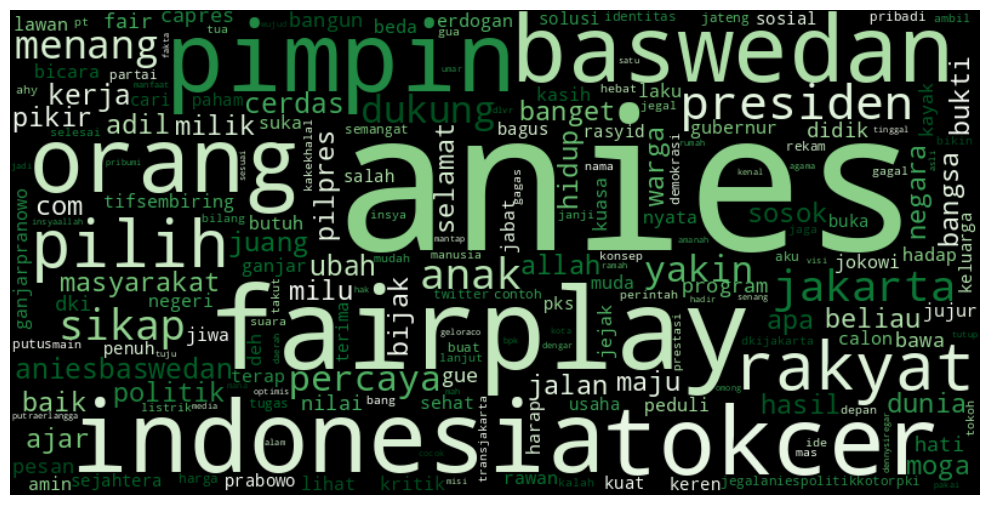

In [210]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Tokenize ulang kolom "NoStopwordsTweets" agar kalimat dikonversi menjadi kata-kata.
re_tokenize = [nltk.word_tokenize(tweet) for tweet in positif]

# Flatten: Konversi list kata-kata ke dalam satu list
list_kata = nltk.FreqDist([kata for tweet in re_tokenize for kata in tweet])

# Wordcloud
wordcloud = WordCloud(width=800, height=400, colormap='Greens').generate_from_frequencies(list_kata)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [211]:
top_10_positif = list_kata.most_common(10)

data_positif = {
    'Kata Positif': [kata for kata, total in top_10_positif],
    'Total': [total for kata, total in top_10_positif]
}

tabel_positif = pd.DataFrame(data_positif)
tabel_positif

,Kata Positif,Total
0,anies,6034
1,fairplay,987
2,indonesia,744
3,pimpin,702
4,tokcer,675
5,baswedan,639
6,orang,610
7,rakyat,509
8,pilih,490
9,presiden,454


Lakukan pengecekan pada data negatif.

In [212]:
negatif = data.loc[data['prediksi']=='negatif', 'tweet']
negatif

0           ruhutsitompul anies pilpres pilkada dkijakarta
1        jabir sink muhammad saewad anies milu junjung ...
4        kasman abdya bachrum achmadi lucu surabaya duk...
7        ch chotimah ganjarpranowo sehat sehat tes cenu...
8        streetlawyers abu waras aniesbaswedan nasdem j...
                               ...                        
11396    bambangmulyonoo cebong panik selisih cuman sur...
11399    kubu anies manyun menang malu tolak hasil surv...
11401    oranjexiv hans sajah txtbacod detikcom anies t...
11403    tanyakanrl anies lumayan gub bijak kadang luar...
11405    iamil heraloebss lapor lapor nama lapor lurah ...
Name: tweet, Length: 4877, dtype: object

Lakukan looping untuk melihat setiap tweet dengan sentimen negatif

In [213]:
for neg in negatif[:10]:
    print(neg)

ruhutsitompul anies pilpres pilkada dkijakarta
jabir sink muhammad saewad anies milu junjung takut takut allah swt takut anies
kasman abdya bachrum achmadi lucu surabaya dukung pks jokowi dukung nasdem bacapres anies usung ubah hasil pks nasdem omong kosong belaka partai makan gaji buta ubah
ch chotimah ganjarpranowo sehat sehat tes cenul depan ide karya nyata anies rekam jejak paham
streetlawyers abu waras aniesbaswedan nasdem jhon plate pencapresan anies
jabir sink tatakujiyati buzzer jelek anies bikin dosa bagus cari duit modal kuajarin profit
gagas ubah asik program kayak sono omong doang gagas ubah program orang sadar anies gede omong gede bacot otak
gara gara anies takut
masdepree veelaarhie aniesbaswedan ahli anies
dennysiregar aniesbaswedan aneh den anies rendah hasil survey anies takut banteng komunis mega pdip sanking takut orang banteng tidur jam melek allah tanda orang underdog anies serang buzzer


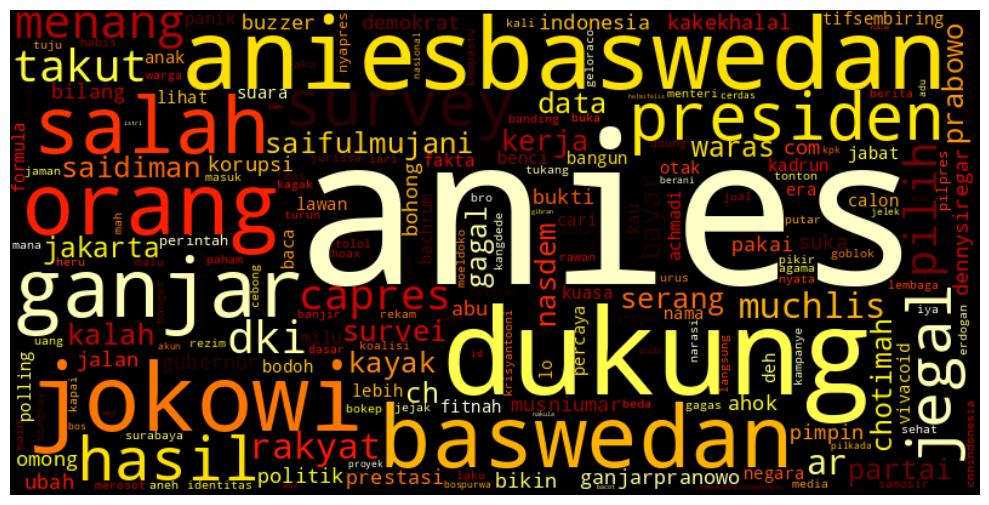

In [214]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Tokenize ulang kolom "NoStopwordsTweets" agar kalimat dikonversi menjadi kata-kata.
re_tokenize = [nltk.word_tokenize(tweet) for tweet in negatif]

# Flatten: Konversi list kata-kata ke dalam satu list
list_kata = nltk.FreqDist([kata for tweet in re_tokenize for kata in tweet])

# Wordcloud
wordcloud = WordCloud(width=800, height=400, colormap='hot').generate_from_frequencies(list_kata)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [215]:
top_10_negatif = list_kata.most_common(10)

data_negatif = {
    'Kata Negatif': [kata for kata, total in top_10_negatif],
    'Total': [total for kata, total in top_10_negatif]
}

tabel_negatif = pd.DataFrame(data_negatif)
tabel_negatif

,Kata Negatif,Total
0,anies,5863
1,dukung,884
2,aniesbaswedan,555
3,jokowi,494
4,baswedan,419
5,orang,415
6,ganjar,388
7,salah,370
8,presiden,355
9,survey,341


Lakukan pengecekan pada data neutral.

In [216]:
neutral = data.loc[data['prediksi']=='neutral', 'tweet']
neutral

5        alhamdulillah guru honorer pai milik kriteria ...
10       bos sir langkahanies anies rawan aniesindonesi...
36       mdy asmara pilpres jokowi menang suara prabowo...
71       cnbcindonesia com news populi center rilis has...
73       jokowi cawe cawe pilpres penasaran kalah anies...
                               ...                        
11377    rocky gerung info upaya tokoh nasional lemah a...
11382           tifsembiring ganjar urut saing berat anies
11383    pks serah nama cawapres anies baswedan youtu hlkk
11398    has meliala anies gerus pilih prabowo pilih ga...
11400    war duduk pangku messi kitagaruda garudamendun...
Name: tweet, Length: 1110, dtype: object

In [217]:
for net in neutral[:10]:
    print(net)

alhamdulillah guru honorer pai milik kriteria terima rapel uang insentif kabar kabarid com nasional kaesang kebiri lepas rafathar prabowo ganjar anies
bos sir langkahanies anies rawan aniesindonesia aniesmania kba news usir asong khilafah
mdy asmara pilpres jokowi menang suara prabowo anies prabowo rebut suara kadrun tinggal tunggu perintah jokowi
cnbcindonesia com news populi center rilis hasil survei baru kait elektabilitas calon presiden menteri tahan prabowo subianto unggul banding saing dekat ganjar pranowo anies baswedan berita mei
jokowi cawe cawe pilpres penasaran kalah anies gelora jokowi
smrc elektabilitas ganjar unggul prabowo anies turki taka erdogan nang baca vibrasi smrc elektabil
ztw rd ganjar prabowo duet ganjar capres prabowo cawapres kubu anies senang menang langsung head head capresnya ganjar wakil anies menang
ikut partai partai calon presiden pdip usung ganjar pranowo nasdem demokrat pks dukung anies baswedan gerindra pkb usung prabowo subianto bersamajuara ridwank

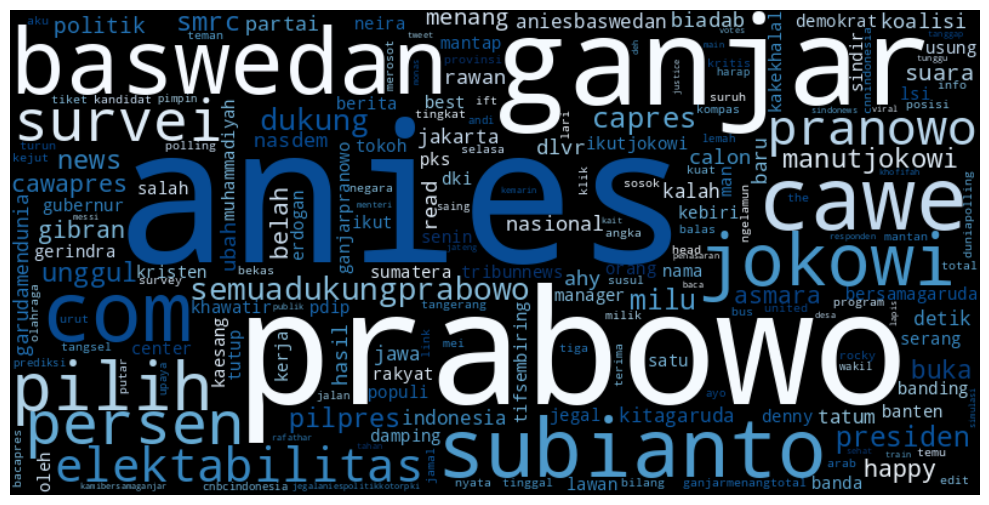

In [218]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Tokenize ulang kolom "NoStopwordsTweets" agar kalimat dikonversi menjadi kata-kata.
re_tokenize = [nltk.word_tokenize(tweet) for tweet in neutral]

# Flatten: Konversi list kata-kata ke dalam satu list
list_kata = nltk.FreqDist([kata for tweet in re_tokenize for kata in tweet])

# Wordcloud
wordcloud = WordCloud(width=800, height=400, colormap='Blues_r').generate_from_frequencies(list_kata)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [219]:
top_10_neutral = list_kata.most_common(10)

data_neutral = {
    'Kata Neutral': [kata for kata, total in top_10_neutral],
    'Total': [total for kata, total in top_10_neutral]
}

tabel_neutral = pd.DataFrame(data_neutral)
tabel_neutral

,Kata Neutral,Total
0,anies,1242
1,prabowo,836
2,ganjar,647
3,baswedan,310
4,cawe,283
5,com,263
6,subianto,248
7,jokowi,237
8,pilih,201
9,persen,188


Lanjutkan dengan melihat banyaknya sentiment positif, negatif, dan netral dari hasil prediksi.

In [220]:
data.groupby(by='prediksi').agg('count')

,tweet,label
prediksi,,
negatif,4877,4877
neutral,1110,1110
positif,5420,5420


In [221]:
data.groupby(by='prediksi')['tweet'].agg('count')

prediksi
negatif    4877
neutral    1110
positif    5420
Name: tweet, dtype: int64

Tampilkan dalam bentuk grafik untuk memudahkan dalam melihat klasifikasi sentimen.

In [222]:
list_prediksi = data.groupby(by='prediksi').agg('count').values.tolist()
print(list_prediksi)

[[4877, 4877], [1110, 1110], [5420, 5420]]


In [223]:
n_negatif = list_prediksi[0][0]
n_neutral = list_prediksi[1][0]
n_positif = list_prediksi[2][0]

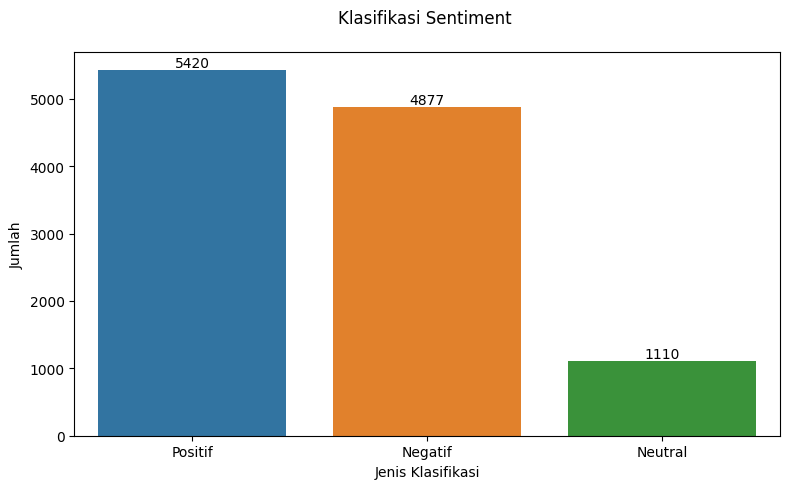

In [224]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = [8,5]
plt.rcParams["figure.autolayout"] = True

x = ['Positif', 'Negatif', 'Neutral']
y = [n_positif, n_negatif, n_neutral]
percentage = [n_positif, n_negatif, n_neutral]

ax = sns.barplot(x=x, y=y)
patches = ax.patches
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()+50
    ax.annotate('{:}'.format(percentage[i]), (x, y), ha='center')

plt.title('Klasifikasi Sentiment \n')
plt.xlabel('Jenis Klasifikasi')
plt.ylabel('Jumlah')
plt.show()

Berdasarkan grafik, didapatkan data sebagai berikut.

1. Sentiment positif merupakan sentiment terbanyak dengan total 5420 sentiment.
2. Sentiment negatif merupakan sentiment dengan total 4877 sentiment.
3. Sentiment neutral merupakan sentiment tersedikit dengan total 1110 sentiment.


## Evaluasi

Cek confussion matrix, classification report, dan cross val score.

In [225]:
data2 = data.copy()
data2.head(5)

,tweet,label,prediksi
0,ruhutsitompul anies pilpres pilkada dkijakarta,0,negatif
1,jabir sink muhammad saewad anies milu junjung ...,0,negatif
2,anies presiden yes lihat track record tokcer ragu,1,positif
3,indonesia ajar usia anies percaya indonesia aj...,1,positif
4,kasman abdya bachrum achmadi lucu surabaya duk...,0,negatif


Tentukan variabel X dan y terlebih dahulu agar dapat digunakan pada pemodelan.

In [226]:
# Menentukan x berdasarkan label
data_tweet = pd.DataFrame(data2,columns=['tweet'])
X = data_tweet['tweet']
X

0           ruhutsitompul anies pilpres pilkada dkijakarta
1        jabir sink muhammad saewad anies milu junjung ...
2        anies presiden yes lihat track record tokcer ragu
3        indonesia ajar usia anies percaya indonesia aj...
4        kasman abdya bachrum achmadi lucu surabaya duk...
                               ...                        
11402                sikap fairplaynya anies hormat hormat
11403    tanyakanrl anies lumayan gub bijak kadang luar...
11404    anies puji adu gagas harap warna pilpres pilpr...
11405    iamil heraloebss lapor lapor nama lapor lurah ...
11406            fairplay pilar anies diri mimbar presiden
Name: tweet, Length: 11407, dtype: object

In [227]:
# Menentukan y berdasarkan label
data_label = pd.DataFrame(data2,columns=['label'])
y = data_label['label']
y

0        0
1        0
2        1
3        1
4        0
        ..
11402    1
11403    0
11404    1
11405    0
11406    1
Name: label, Length: 11407, dtype: int64

Lakukan pembagian antara data train dan data test dengan rasio 8:2 atau data train sebesar 80% dan data test sebesar 20%.

In [228]:
from sklearn.model_selection import train_test_split

# Split dataset untuk train dan test
X_train,X_test,Y_train,Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Lakukan vektorisasi untuk TF-IDF.

In [229]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF train-test
vect = TfidfVectorizer(analyzer="word", min_df=0.0004, max_df=0.115, ngram_range=(1,3))
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)
X_test_dtm = vect.transform(X_test)

Lakukan perhitungan skor akurasi berdasarkan MultinomialNB.

In [230]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Melakukan perhitungan skor akurasi berdasarkan MultinomialNB
svmmodel = SVC(gamma=0.1)
svmmodel = svmmodel.fit(X_train_dtm,Y_train)
Y_pred = svmmodel.predict(X_test_dtm)
print(f"Akurasi: {accuracy_score(Y_test,Y_pred)*100:.2f}")

Akurasi: 88.48


Tentukan hasil dari confusion matrix

In [231]:
from sklearn.metrics import confusion_matrix

# Menentukan confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
print(f"Confusion Matrix:\n\n{cm}")

Confusion Matrix:

[[934  61   4]
 [126 943   4]
 [ 49  19 142]]


In [232]:
sentimen = ['Negatif', 'Positif', 'Neutral']
df_cm = pd.DataFrame(cm, index=sentimen, columns=sentimen)
df_cm

,Negatif,Positif,Neutral
Negatif,934,61,4
Positif,126,943,4
Neutral,49,19,142


Tentukan hasil laporan klasifikasi.

In [233]:
from sklearn.metrics import classification_report

# Menentukan laporan hasil klasifikasi
report = classification_report(Y_test, Y_pred)
print(f"Hasil Laporan Klasifikasi:\n\n{report}")

Hasil Laporan Klasifikasi:

              precision    recall  f1-score   support

           0       0.84      0.93      0.89       999
           1       0.92      0.88      0.90      1073
           2       0.95      0.68      0.79       210

    accuracy                           0.88      2282
   macro avg       0.90      0.83      0.86      2282
weighted avg       0.89      0.88      0.88      2282



Tentukan nilai cross_val_score.

In [234]:
from sklearn.model_selection import cross_val_score

# Menentukan nilai cross_val_score
cvs = cross_val_score(estimator=nbmodel, X=X_train_dtm, y=Y_train, cv=10)

# Loop kemudian cetak hasil
print("Cross Val Score:")
for n, score in enumerate(cvs, start=1):
    print(f"Folds ke-{n}: {score*100:.2f}")

Cross Val Score:
Folds ke-1: 85.54
Folds ke-2: 85.10
Folds ke-3: 85.43
Folds ke-4: 86.20
Folds ke-5: 85.54
Folds ke-6: 84.65
Folds ke-7: 85.31
Folds ke-8: 85.75
Folds ke-9: 85.53
Folds ke-10: 87.28


In [235]:
cvs_list = cvs.tolist()

# +1 pada nilai n_max dan n_min karena index dimulai dari 0
max_cvs = max(cvs_list)
n_max = (cvs_list.index(max_cvs)) + 1

min_cvs = min(cvs_list)
n_min = (cvs_list.index(min_cvs)) + 1

print(f"Cross val score terbesar terletak pada fold ke-{n_max} dengan nilai {max_cvs*100:.2f}")
print(f"Cross val score terkecil terletak pada fold ke-{n_min} dengan nilai {min_cvs*100:.2f}")

Cross val score terbesar terletak pada fold ke-10 dengan nilai 87.28
Cross val score terkecil terletak pada fold ke-6 dengan nilai 84.65


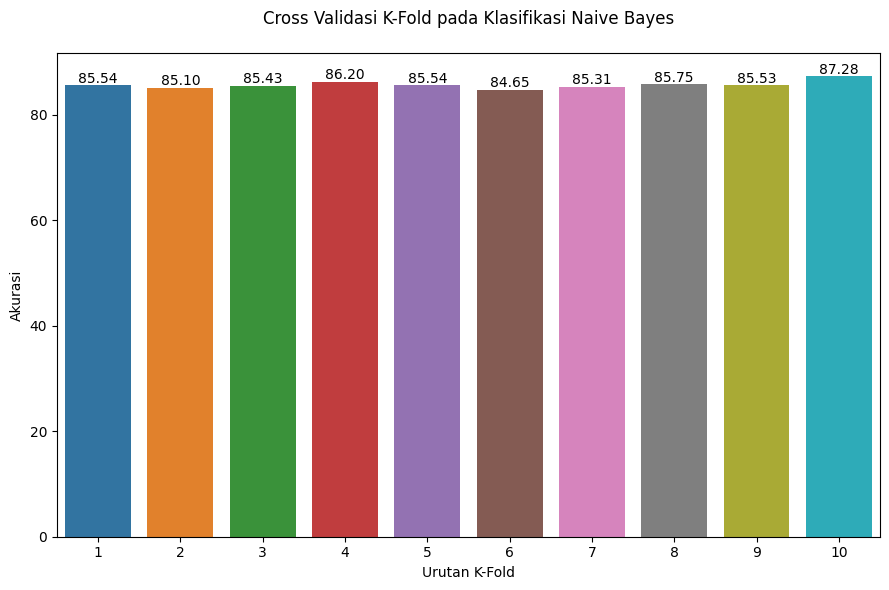

In [236]:
plt.rcParams["figure.figsize"] = [9,6]
plt.rcParams["figure.autolayout"] = True

# Tentukan x dan y pada plot
x = [1,2,3,4,5,6,7,8,9,10]
y = cvs*100

percentage = cvs*100
ax = sns.barplot(x=x, y=y)
patches = ax.patches

# Tambah keterangan di atas barplot
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()+.5
    ax.annotate('{:.2f}'.format(percentage[i]), (x, y), ha='center')

# Plot barplot
plt.title('Cross Validasi K-Fold pada Klasifikasi Naive Bayes\n')
plt.xlabel('Urutan K-Fold')
plt.ylabel('Akurasi')
plt.show()